In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from ietf_wg_mb_extractor import IETF_WG_MB_Extractor
from argparse import ArgumentParser


%load_ext autoreload
%autoreload 2
from explore_data import DataExplorer
from prepare_data import DataPreparator

In [31]:
# Creating train and test datasets
import pandas as pd
from sklearn.model_selection import train_test_split

data_path = "data/labeled data.xlsx"

df = pd.read_excel(data_path)
df.drop(columns='comment', inplace=True)

texts, labels = df.text.to_list(), df.label.tolist()

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=79, random_state=77, stratify=labels)

train_df = pd.DataFrame({"text": X_train, "label": y_train})
test_df = pd.DataFrame({"text": X_test, "label": y_test})

train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

In [34]:
from transformers.pipelines.pt_utils import KeyDataset
import datasets

test_data = pd.read_csv("data/test_data.csv")

test_ds = datasets.Dataset.from_pandas(pd.DataFrame(data=test_data))

In [42]:
test_ds[0]

{'text': "i don't know how esps and from rewrite ended up in the same sentence. esps do not need from rewrite because they can do dkim signing. the incentives are all against them using or allowing from rewrite. taking business from criminal clients does not include allowing one client to impersonate another client or a non-client. such behavior would hurt the revenue of the esp.",
 'label': 0}

In [2]:
def set_parameters(grid_color, axes_facecolor, figsize):
    sns.set(rc={"grid.color": grid_color, 
                "axes.facecolor": axes_facecolor,
                'figure.figsize': figsize})

In [3]:
set_parameters(grid_color="lightgray", axes_facecolor="white", figsize=(6, 3))

In [4]:
archive_path = 'email-archives/'

In [5]:
extractor = IETF_WG_MB_Extractor(archive_path)
extractor.combine_wg_files(ratio=None)
active_wg_dataframe = extractor.get_combined_wg_dataframes()

Successfully scraped active WG names
------------------------------------
Successfully extracted names of active WGs existing in files
------------------------------------------------------------
Successfully converted and concatenated all .csv files into one dataframe
-------------------------------------------------------------------------


In [6]:
extractor = IETF_WG_MB_Extractor(archive_path)
data_preparator = DataPreparator(extractor)
clean_wg_dataframe = data_preparator.emails_df_cleaning(active_wg_dataframe)
processed_bodies = data_preparator.preprocess_bodies()
text_coll_combined = data_preparator.wg_combined_bodies_to_dict(processed_bodies)
text_coll_default = data_preparator.wg_bodies_to_dict(processed_bodies)

data_explorer = DataExplorer(colors = ['#eee82c', '#91cb3e', '#17A72D', '#4c934c','#368245'])

Initial dataframe shape: (527508, 8)
-----------------------------------------
Dataframe shape after cleaning rows: (46265, 9)

------PROCESSING------



100%|██████████| 46265/46265 [01:04<00:00, 714.54it/s] 


Prepocessing time: 64.75 s.

Number of mails removed: 12891
---------------------------------------
Encrypted messages: 3310
Ill from-formated messages: 208
Announc. messages: 4699
Unknown endcoding messages: 62
Empty messages post-processing: 4063
Diff. language: 462
Diverse other noise: 87


In [38]:
len(processed_bodies)

33848

In [90]:
len(text_coll_default.keys())

88

In [44]:
test_wg = 'netmod'

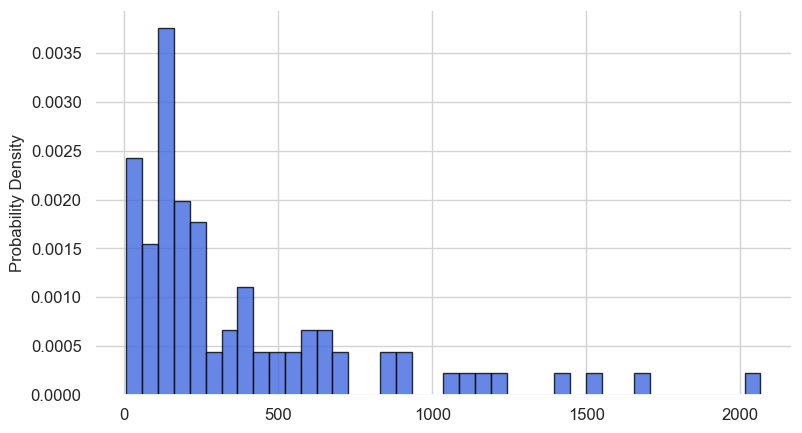

In [89]:
bodies_counts = data_explorer.messages_per_wg(text_coll_default, 88, histogram=True, bins=40)

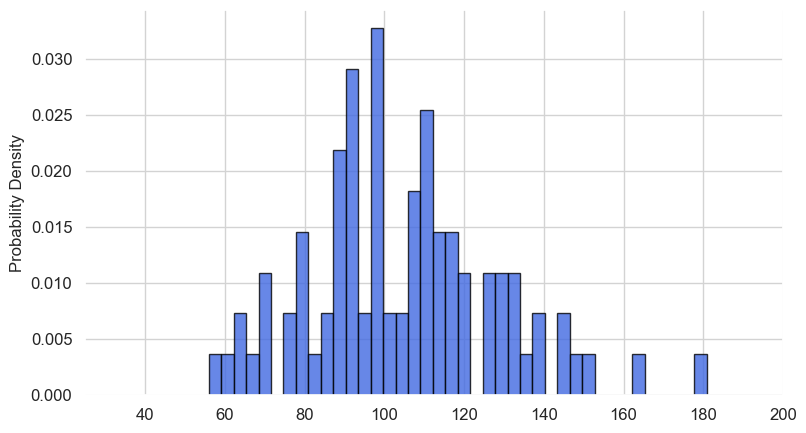

In [110]:
msg_body_lengths = data_explorer.wg_body_len_dist(text_coll_default,
                                                  avg_per_group=True,
                                                  whole=True,
                                                  histogram=True,
                                                  bins=200,
                                                  limit=[25, 200])

In [12]:
top_10_groups = ['idr', 'lsr', 'dmarc', 'tsvwg', 'teas', 'spring', 'bess', 'oauth', 'netmod', 'opsawg']
all_groups = list(text_coll_combined.keys())

In [ ]:
data_explorer.wg_wordcloud()

In [22]:
data_explorer.ngram_vectorizer(text_coll_combined, 
                               vectorizer_type='tf_idf', 
                               wgs=top_10_groups,
                               ngram_range=(1,1), 
                               min_df=1,
                               top_n=10)

           idr    lsr  dmarc  tsvwg   teas  spring   bess  oauth  netmod  \
dmarc    0.000  0.000  0.572  0.000  0.000   0.000  0.000  0.000   0.000   
l4s      0.000  0.000  0.000  0.538  0.001   0.000  0.000  0.000   0.000   
link     0.388  0.428  0.527  0.330  0.294   0.383  0.359  0.378   0.426   
oauth    0.000  0.000  0.000  0.000  0.000   0.000  0.000  0.462   0.000   
slice    0.004  0.006  0.000  0.000  0.419   0.020  0.000  0.000   0.000   
bgp      0.400  0.125  0.000  0.000  0.004   0.026  0.197  0.000   0.003   
network  0.047  0.088  0.002  0.060  0.395   0.077  0.044  0.008   0.032   
yang     0.009  0.012  0.000  0.000  0.051   0.003  0.003  0.000   0.365   
draft    0.300  0.201  0.020  0.108  0.140   0.267  0.296  0.097   0.089   
srv6     0.042  0.028  0.000  0.000  0.002   0.277  0.172  0.000   0.000   

         opsawg  highest_score  
dmarc     0.003          0.572  
l4s       0.000          0.538  
link      0.500          0.527  
oauth     0.000          0.462 

In [ ]:
# Pos-negative scales: 4 down to -4
data_explorer.sent_lex_vectorizer(text_coll_combined, wgs=list(text_coll_combined.keys()), pos_thres=3, neg_thresh=-3)

In [24]:
data_explorer.keyword_concordance(text_coll_default, 
                                  list(text_coll_default.keys()),
                                  keywords=['bgp'],
                                  left_context=10,
                                  right_context=10,
                                  max_num_samples=20)

Concordandce for the keywords ['bgp'] (+10 keyword +10)

WG: ANIMA
been there with many routing area extensions to ospf or $bgp$ as well) [link] the short is that they can't see
------------------------------

WG: BABEL
document is inspired by a previously defined extension to the $bgp$ protocol <xref target="rfc5549"/>. it is important to cite the older
------------------------------

WG: BABEL
responsible protocol - if a router running both babel and $bgp$ finds out that it has no route to a given
------------------------------

WG: BABEL
to have a babel dummy address, distinct from a hypothetical $bgp$ dummy address or an ospf dummy address. if we define
------------------------------

WG: BABEL
responsible protocol - if a router running both babel and $bgp$ finds out that it has no route to a given
------------------------------

WG: BABEL
to have a babel dummy address, distinct from a hypothetical $bgp$ dummy address or an ospf dummy address. if we define
-------------------------

In [39]:
train_bodies = data_preparator.prepare_data_for_model(text_coll_default, seed=77, percent_of_data=0.99)

Requested num. of samples: 31382
Actual num. of samples (due to post duplicate-removal): 30819


In [40]:
# Noise that could not have been removed 
train_bodies = [body for body in train_bodies if 'count bytes who' not in body]

In [ ]:
train_bodies

In [ ]:
for i, body in enumerate(train_bodies):
    print(i)
    print(body)
    print("-----------------------------", end='\n\n')